In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import random
import glob

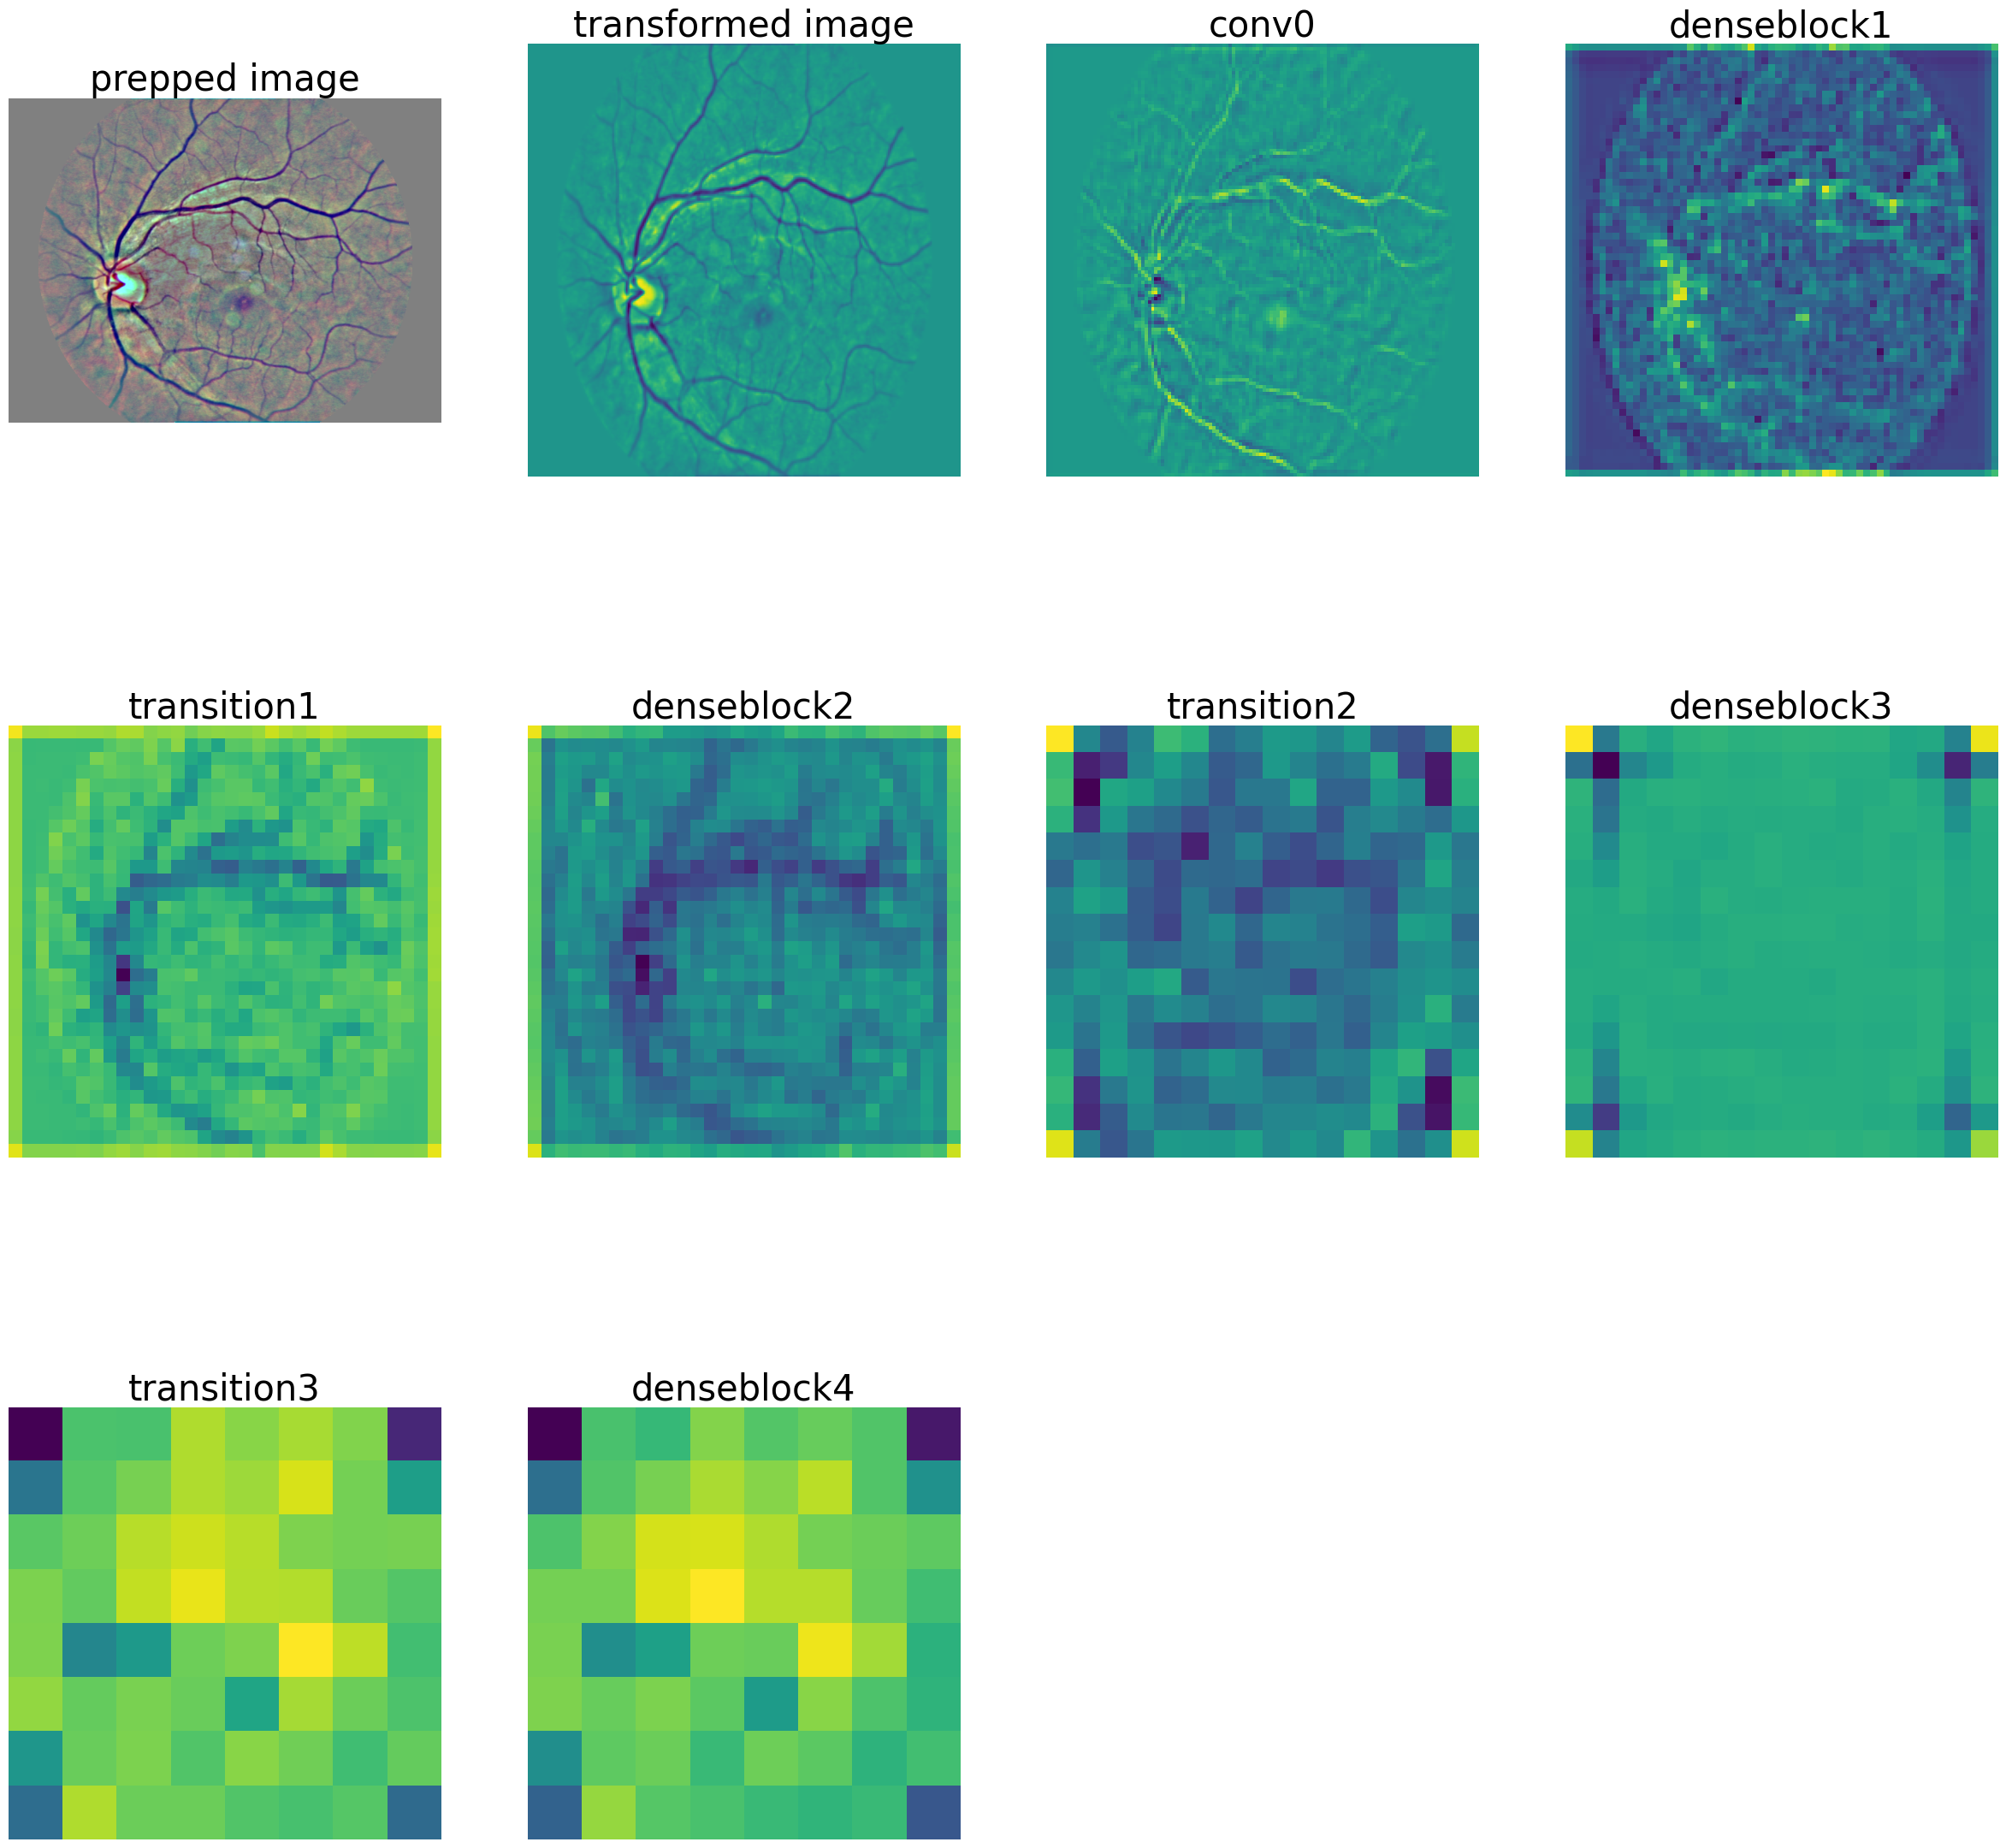

In [4]:
transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

pathModel = "models/densenet_100epochs_data_norm_randomCropRotation.pt"

model = torchvision.models.densenet121(pretrained=False)
num_ftrs = model.classifier.in_features
model.classifier  = nn.Sequential(nn.Linear(num_ftrs, 500),nn.Linear(500,  2))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.load_state_dict(torch.load(pathModel))
model = model.eval()

outputs = []
names = []

img_path = random.choice(glob.glob('data/test/diabetic/*.png')+glob.glob('data/test/control/*.png'))
image = Image.open(img_path)

fig = plt.figure(figsize=(30, 50))
a = fig.add_subplot(5, 4, 1)
imgplot = plt.imshow(image)
a.axis("off")
a.set_title('prepped', fontsize=30)

image = transform(image)
outputs.append(image)
names.append('transformed')

image = image.unsqueeze(0)
image = image.to(device)

model_children = list(model.children())[0]

for i in range(len(list(model.children())[0])):
    child = list(list(model.children())[0].children())[i]
    name = list(list(model.children())[0].named_children())[i][0]
    name_list = str(type(child)).split('.')
    image = child(image)
    # print(name_list[-2])
    if name_list[-2] in ['conv', 'densenet']:
        # print(name_list[-1])
        outputs.append(image)
        names.append(name)
      
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
    
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+2)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)

In [ ]:
transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

pathModel = "models/densenet_100epochs_data_raw_norm_randomCropRotation.pt"

model = torchvision.models.densenet121(pretrained=False)
num_ftrs = model.classifier.in_features
model.classifier  = nn.Sequential(nn.Linear(num_ftrs, 500),nn.Linear(500,  2))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.load_state_dict(torch.load(pathModel))
model = model.eval()

outputs = []
names = []

img_path = random.choice(glob.glob('data_raw/test/diabetic/*.tif')+glob.glob('data_raw/test/control/*.tif'))
image = Image.open(img_path)

fig = plt.figure(figsize=(30, 50))
a = fig.add_subplot(5, 4, 1)
imgplot = plt.imshow(image)
a.axis("off")
a.set_title('orginal', fontsize=30)

image = transform(image)
outputs.append(image)
names.append('transformed')

image = image.unsqueeze(0)
image = image.to(device)

model_children = list(model.children())[0]

for i in range(len(list(model.children())[0])):
    child = list(list(model.children())[0].children())[i]
    name = list(list(model.children())[0].named_children())[i][0]
    name_list = str(type(child)).split('.')
    image = child(image)
    # print(name_list[-2])
    if name_list[-2] in ['conv', 'densenet']:
        # print(name_list[-1])
        outputs.append(image)
        names.append(name)
      
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
    
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+2)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)

In [ ]:
transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

pathModel = "models/densenet_100epochs_data_vessel_randomCropRotation.pt"

model = torchvision.models.densenet121(pretrained=False)
num_ftrs = model.classifier.in_features
model.classifier  = nn.Sequential(nn.Linear(num_ftrs, 500),nn.Linear(500,  2))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.load_state_dict(torch.load(pathModel))
model = model.eval()

outputs = []
names = []

img_path = random.choice(glob.glob('data_vessel/test/diabetic/*.tif')+glob.glob('data_vessel/test/control/*.tif'))
image = Image.open(img_path)

fig = plt.figure(figsize=(30, 50))
a = fig.add_subplot(5, 4, 1)
imgplot = plt.imshow(image)
a.axis("off")
a.set_title('segmetation', fontsize=30)

image = transform(image)
outputs.append(image)
names.append('transformed')

image = image.unsqueeze(0)
image = image.to(device)

model_children = list(model.children())[0]

for i in range(len(list(model.children())[0])):
    child = list(list(model.children())[0].children())[i]
    name = list(list(model.children())[0].named_children())[i][0]
    name_list = str(type(child)).split('.')
    image = child(image)
    # print(name_list[-2])
    if name_list[-2] in ['conv', 'densenet']:
        # print(name_list[-1])
        outputs.append(image)
        names.append(name)
      
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
    
for i in range(len(processed)):
    a = fig.add_subplot(5, 4, i+2)
    imgplot = plt.imshow(processed[i])
    a.axis("off")
    a.set_title(names[i].split('(')[0], fontsize=30)